In [1]:
import os
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize, PolynomialFeatures
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
train_ds = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv', index_col='id')

test_ds = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv', index_col='id')

data_dictionary = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

In [3]:
train_ds

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [4]:
test_ds

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0


In [5]:
train_ds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 00008ff9 to ffef538e
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-Season                             2555 non-null   object 
 4   CGAS-CGAS_Score                         2421 non-null   float64
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Waist_Circumference            898 non-null    float64
 10  Physical-Diastolic_BP                   2954 non-null 

In [6]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 00008ff9 to 00ebc35d
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               20 non-null     object 
 1   Basic_Demos-Age                         20 non-null     int64  
 2   Basic_Demos-Sex                         20 non-null     int64  
 3   CGAS-Season                             10 non-null     object 
 4   CGAS-CGAS_Score                         8 non-null      float64
 5   Physical-Season                         14 non-null     object 
 6   Physical-BMI                            13 non-null     float64
 7   Physical-Height                         13 non-null     float64
 8   Physical-Weight                         13 non-null     float64
 9   Physical-Waist_Circumference            5 non-null      float64
 10  Physical-Diastolic_BP                   11 non-null     

In [7]:
train_cat_columns = train_ds.select_dtypes(exclude = 'number').columns

for season in train_cat_columns:
    train_ds[season] = train_ds[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})

/tmp/ipykernel_17/797651415.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_ds[season] = train_ds[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})


In [8]:
test_cat_columns = test_ds.select_dtypes(exclude = 'number').columns

for season in test_cat_columns:
    test_ds[season] = test_ds[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})

/tmp/ipykernel_17/1751643514.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_ds[season] = test_ds[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})


In [9]:
train_cat_columns = train_ds.select_dtypes(exclude = 'number').columns

for season in train_cat_columns:
    train_ds[season] = train_ds[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})

In [10]:
null = train_ds.isna().sum().sort_values(ascending = False).head(70)
null = pd.DataFrame(null)
null = null.rename(columns= {0:'Missing'})
null.style.background_gradient(cmap='YlOrRd')

,Missing
PAQ_A-Season,3485
PAQ_A-PAQ_A_Total,3485
Fitness_Endurance-Time_Sec,3220
Fitness_Endurance-Time_Mins,3220
Fitness_Endurance-Max_Stage,3217
Physical-Waist_Circumference,3062
FGC-FGC_GSND_Zone,2898
FGC-FGC_GSD_Zone,2897
FGC-FGC_GSD,2886
FGC-FGC_GSND,2886


In [11]:
train_ds_usable = train_ds[train_ds['sii'].notnull()]

null = train_ds_usable.isna().sum().sort_values(ascending = False).head(70)
null = pd.DataFrame(null)
null = null.rename(columns= {0:'Missing'})
null.style.background_gradient(cmap='YlOrRd')

,Missing
PAQ_A-Season,2373
PAQ_A-PAQ_A_Total,2373
Physical-Waist_Circumference,2253
Fitness_Endurance-Time_Sec,2008
Fitness_Endurance-Time_Mins,2008
Fitness_Endurance-Max_Stage,2005
FGC-FGC_GSD_Zone,1872
FGC-FGC_GSND_Zone,1872
FGC-FGC_GSD,1865
FGC-FGC_GSND,1864


In [12]:
train_ds_usable.shape

(2736, 81)

In [13]:
train_ds_usable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 00008ff9 to ffed1dd5
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2736 non-null   int64  
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-Season                             2342 non-null   float64
 4   CGAS-CGAS_Score                         2342 non-null   float64
 5   Physical-Season                         2595 non-null   float64
 6   Physical-BMI                            2527 non-null   float64
 7   Physical-Height                         2530 non-null   float64
 8   Physical-Weight                         2572 non-null   float64
 9   Physical-Waist_Circumference            483 non-null    float64
 10  Physical-Diastolic_BP                   2478 non-null 

In [14]:
PCIAT_cols = [val for val in train_ds_usable.columns[train_ds_usable.columns.str.contains('PCIAT')]]
print('Number of PCIAT features = ' , len(PCIAT_cols))

Number of PCIAT features =  22


In [15]:
PCIAT_cols.remove('PCIAT-PCIAT_Total')
train_ds_usable = train_ds_usable.drop(columns = PCIAT_cols)


In [16]:
train_ds_usable.shape

(2736, 60)

In [17]:
corr = pd.DataFrame(train_ds_usable.corr()['PCIAT-PCIAT_Total'].sort_values(ascending = False))
corr.style.background_gradient(cmap='YlOrRd')

,PCIAT-PCIAT_Total
PCIAT-PCIAT_Total,1.000000
sii,0.899681
Physical-Height,0.420765
Basic_Demos-Age,0.409559
PreInt_EduHx-computerinternet_hoursday,0.374124
Physical-Weight,0.353048
Physical-Waist_Circumference,0.327013
FGC-FGC_CU,0.287494
BIA-BIA_BMI,0.248060
Physical-BMI,0.240858


In [18]:
selection = corr[(corr['PCIAT-PCIAT_Total']>.1) | (corr['PCIAT-PCIAT_Total']<-.1)]
selection = [val for val in selection.index]
selection.remove('PCIAT-PCIAT_Total')
selection.remove('sii')
selection.remove('Physical-BMI')
selection.remove('SDS-SDS_Total_Raw')

In [19]:
selection

['Physical-Height',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'FGC-FGC_CU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'FGC-FGC_GSD',
 'Physical-Systolic_BP',
 'FGC-FGC_GSND',
 'FGC-FGC_TL',
 'BIA-BIA_FFMI',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_SRL_Zone']

In [20]:
half_missing = [val for val in train_ds_usable.columns[train_ds_usable.isnull().sum()>len(train_ds_usable)/2]]
half_missing

['Physical-Waist_Circumference',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'PAQ_A-Season',
 'PAQ_A-PAQ_A_Total']

In [21]:
selection = [i for i in selection if i not in half_missing]
selection

['Physical-Height',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'FGC-FGC_CU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'Physical-Systolic_BP',
 'FGC-FGC_TL',
 'BIA-BIA_FFMI',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_SRL_Zone']

In [22]:
train_ds_selection = train_ds_usable[selection]

In [23]:
train_ds_selection.describe()

,Physical-Height,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,Physical-Weight,FGC-FGC_CU,BIA-BIA_BMI,SDS-SDS_Total_T,FGC-FGC_PU,BIA-BIA_Frame_num,Physical-Systolic_BP,FGC-FGC_TL,BIA-BIA_FFMI,FGC-FGC_SRR_Zone,FGC-FGC_SRL_Zone
count,2530.000000,2736.000000,2654.000000,2572.000000,1919.000000,1813.000000,2525.000000,1909.000000,1813.000000,2478.000000,1919.000000,1813.000000,1879.000000,1877.000000
mean,55.897051,10.238670,1.015072,87.839592,11.912976,19.232347,57.647525,5.782609,1.733591,117.127926,9.119567,14.992021,0.634380,0.636654
std,7.394938,3.427982,1.080861,43.353079,11.979877,4.921900,13.042815,7.441061,0.671201,17.221707,2.954478,6.012465,0.481732,0.481091
min,36.000000,5.000000,0.000000,0.000000,0.000000,0.048267,38.000000,0.000000,1.000000,49.000000,0.000000,7.864850,0.000000,0.000000
25%,50.050000,8.000000,0.000000,57.200000,4.000000,15.857600,47.000000,0.000000,1.000000,107.000000,7.000000,13.381000,0.000000,0.000000
50%,55.000000,10.000000,1.000000,75.800000,10.000000,17.850600,55.000000,3.000000,2.000000,114.000000,9.000000,14.062900,1.000000,1.000000
75%,61.750000,12.000000,2.000000,111.450000,16.000000,21.206000,64.000000,9.000000,2.000000,125.000000,12.000000,15.371600,1.000000,1.000000
max,78.500000,22.000000,3.000000,315.000000,115.000000,48.375400,100.000000,51.000000,3.000000,203.000000,21.000000,217.771000,1.000000,1.000000


In [24]:
X = train_ds_selection
y = train_ds_usable['sii']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
categorical_features = ['BIA-BIA_Frame_num', 'FGC-FGC_SRR_Zone', 'FGC-FGC_SRL_Zone']
numeric_features = [col for col in X.columns if col not in categorical_features]

In [27]:
# Pipeline for numerical columns (using mean)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

# Pipeline for categorial columns (using mode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  
])

# Combine both on ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full pipeline with baseline model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evalute
y_pred = model_pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.91      0.77       319
         1.0       0.34      0.18      0.23       146
         2.0       0.27      0.14      0.19        76
         3.0       0.00      0.00      0.00         7

    accuracy                           0.59       548
   macro avg       0.32      0.31      0.30       548
weighted avg       0.52      0.59      0.54       548



In [28]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'classifier__max_depth': 30, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}


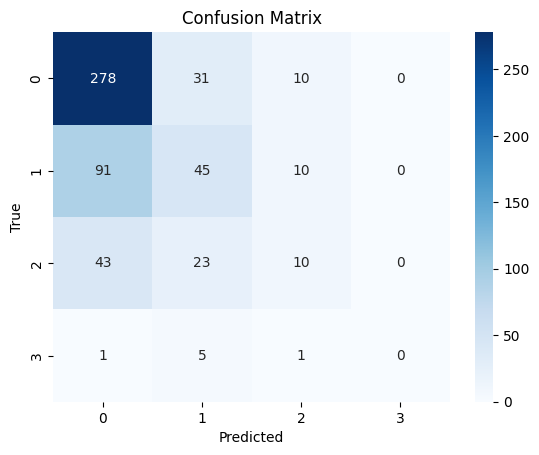

In [29]:
y_pred_final = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [30]:
test = test_ds[selection]
test

,Physical-Height,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,Physical-Weight,FGC-FGC_CU,BIA-BIA_BMI,SDS-SDS_Total_T,FGC-FGC_PU,BIA-BIA_Frame_num,Physical-Systolic_BP,FGC-FGC_TL,BIA-BIA_FFMI,FGC-FGC_SRR_Zone,FGC-FGC_SRL_Zone
id,,,,,,,,,,,,,,
00008ff9,46.00,5,3.0,50.8,0.0,16.8792,NaN,0.0,1.0,NaN,6.0,13.8177,0.0,0.0
000fd460,48.00,9,0.0,46.0,3.0,14.0371,64.0,5.0,1.0,122.0,3.0,12.8254,1.0,1.0
00105258,56.50,10,2.0,75.6,20.0,NaN,54.0,7.0,NaN,117.0,5.0,NaN,1.0,1.0
00115b9f,56.00,9,0.0,81.6,18.0,18.2943,45.0,5.0,2.0,117.0,7.0,14.0740,0.0,0.0
0016bb22,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001f3379,59.50,13,0.0,112.2,12.0,30.1865,56.0,6.0,2.0,102.0,8.0,16.6877,1.0,1.0
0038ba98,55.00,10,3.0,84.6,9.0,19.6629,40.0,2.0,2.0,163.0,11.0,14.7000,1.0,1.0
0068a485,59.25,10,2.0,84.2,0.0,16.8631,NaN,0.0,2.0,116.0,4.0,13.6092,0.0,0.0
0069fbed,NaN,15,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
y_test_pred = best_model.predict(test)
df_submit = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")

x_sub = df_submit[["id"]].copy()
x_sub["sii"] = y_test_pred.astype(int)

In [32]:
x_sub.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
